# Car Price

<a href="https://colab.research.google.com/github/saurav-singh321/Flask_ML/blob/main/Car%20Price%20prediction.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
#importing necessary libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data
df = pd.read_csv('https://raw.githubusercontent.com/saurav-singh321/Flask_ML/main/train_car.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
#checking shape
df.shape

(301, 9)

In [4]:
#checking null values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

we do not have any null values

In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


This gives the stats of every feature like min,max,mean and median etc.

# Categorical features

In [6]:
categorical_features = df.select_dtypes(include='O').columns
print(categorical_features)

df[categorical_features]

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')


,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual
...,...,...,...,...
296,city,Diesel,Dealer,Manual
297,brio,Petrol,Dealer,Manual
298,city,Petrol,Dealer,Manual
299,city,Diesel,Dealer,Manual


In [7]:
#lets find out how many categories are there in each feature and what are the categories
categorical_features_count = {features:len(df[features].unique()) for features in categorical_features}
print(categorical_features_count)
print()


for features in categorical_features:
    if features!='Car_Name': #because it has too many categories
        print(features,'-',df[features].unique())

{'Car_Name': 98, 'Fuel_Type': 3, 'Seller_Type': 2, 'Transmission': 2}

Fuel_Type - ['Petrol' 'Diesel' 'CNG']
Seller_Type - ['Dealer' 'Individual']
Transmission - ['Manual' 'Automatic']


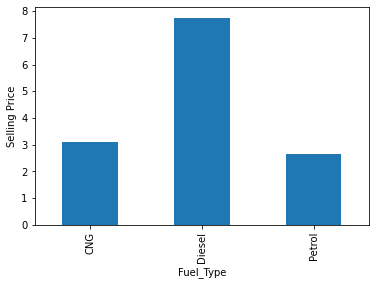

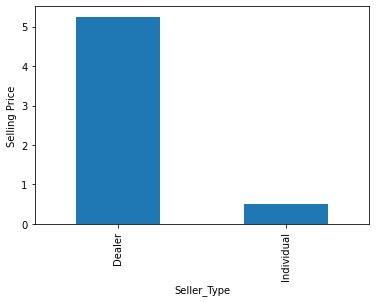

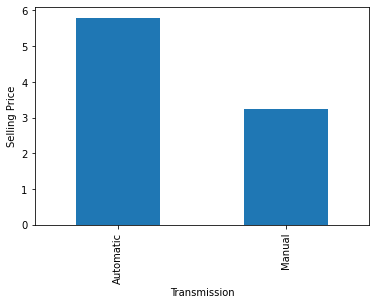

In [8]:
# now we will see the relationship between target variable and categorical varibale
for features in categorical_features:
    if features != 'Car_Name': #because it has too many categories
        df.groupby(features)['Selling_Price'].median().plot(kind='bar')
        plt.xlabel(features)
        plt.ylabel('Selling Price')
        plt.show()

# Observation

1. `Diesel` Car are costlier.
2. Car which is sold by `Dealer` are more expensive.
3. `Automatic` cars are costlier.

# Numerical features

In [9]:
numerical_features = df.select_dtypes(exclude='O').columns
print(numerical_features)

df[numerical_features]

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0
...,...,...,...,...,...
296,2016,9.50,11.60,33988,0
297,2015,4.00,5.90,60000,0
298,2009,3.35,11.00,87934,0
299,2017,11.50,12.50,9000,0


In [10]:
#lets find out how many values are there in each feature
numerical_features_count = {features:len(df[features].unique()) for features in numerical_features}
print(numerical_features_count)

{'Year': 16, 'Selling_Price': 156, 'Present_Price': 147, 'Kms_Driven': 206, 'Owner': 3}


### Discrete

['Owner']


<AxesSubplot:xlabel='Owner'>

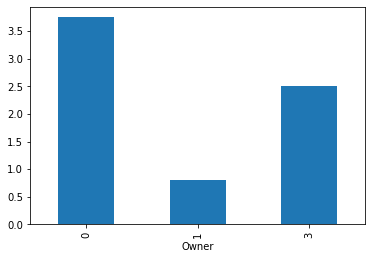

In [11]:
discrete_features = [features for features in numerical_features if len(df[features].unique())<5]
print(discrete_features)


df.groupby('Owner')['Selling_Price'].median().plot(kind='bar')

There are more cars which has 0 `previous owners` means it is new.

### Continuous

['Selling_Price', 'Present_Price', 'Kms_Driven']


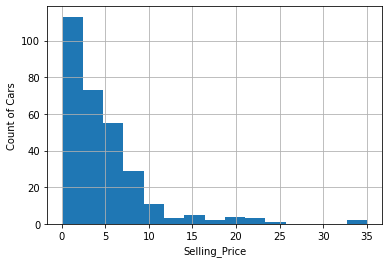

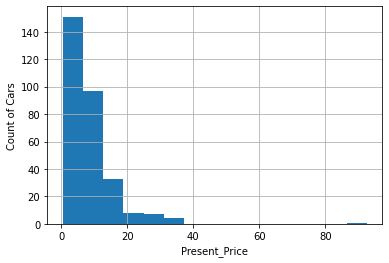

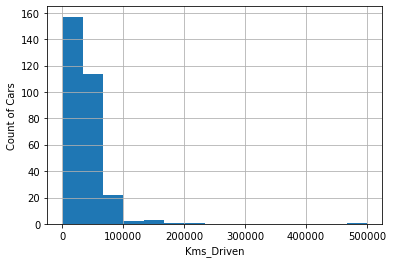

In [12]:
continuous_features = [features for features in numerical_features if features not in discrete_features+['Year']]
print(continuous_features)

for features in continuous_features:
    df[features].hist(bins=15)
    plt.xlabel(features)
    plt.ylabel('Count of Cars')
    plt.show()

# Observation

1. Car whose range is b/w `0-2 lakhs` are more.
2. Car travelled `0-25000` kms are more.
3. Car which has `0` previous owner are more i.e. `new cars` are more.

The data is left skewed so we will take log of this in feature engineering to make it normal

## Datetime 

here we have one datetime feature also

<AxesSubplot:xlabel='Year'>

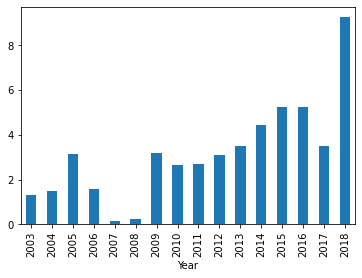

In [13]:
df.groupby('Year')['Selling_Price'].median().plot(kind='bar')

More cars were in the year 2018

In [14]:
#To convert the year in numbers
df['Years'] = 2022 - df['Year']
df.drop('Year',axis=1,inplace=True)
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,6
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,7
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,13
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,5


By this we can say that -
1. ritz is `8` years old.
2. sx4 is `9` years old. etc.

In [15]:
#dropping car name as it will not help us to predict the price 
df.drop('Car_Name',axis=1,inplace=True)
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,6
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,7
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,13
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,5


## Checking the cardinality of categorical features to decide which encoding method to use

In [16]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [17]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [18]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

As the Unique values are not very high we can use `One Hot Encoding` to convert categorical variables in numbers.

In [19]:
# Converting categorical variables in number by one hot encoding
df = pd.get_dummies(df)
df

,Selling_Price,Present_Price,Kms_Driven,Owner,Years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,8,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,9,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,5,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,11,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,8,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,6,0,1,0,1,0,0,1
297,4.00,5.90,60000,0,7,0,0,1,1,0,0,1
298,3.35,11.00,87934,0,13,0,0,1,1,0,0,1
299,11.50,12.50,9000,0,5,0,1,0,1,0,0,1


In [20]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,-0.025164,0.552339,-0.540571,0.550724,-0.550724,0.367128,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,-0.011500,0.473306,-0.465244,0.512030,-0.512030,0.348715,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.012223,0.172515,-0.172874,0.101419,-0.101419,0.162510,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.014272,-0.053469,0.055687,-0.124269,0.124269,0.050316,-0.050316
Years,-0.236141,0.047584,0.524342,0.182104,1.000000,0.017790,-0.064315,0.059959,-0.039896,0.039896,0.000394,-0.000394
Fuel_Type_CNG,-0.025164,-0.011500,0.012223,-0.014272,0.017790,1.000000,-0.040808,-0.160577,0.060300,-0.060300,-0.032018,0.032018
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,-0.040808,1.000000,-0.979648,0.350467,-0.350467,0.098643,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.160577,-0.979648,1.000000,-0.358321,0.358321,-0.091013,0.091013
Seller_Type_Dealer,0.550724,0.512030,0.101419,-0.124269,-0.039896,0.060300,0.350467,-0.358321,1.000000,-1.000000,0.063240,-0.063240
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.060300,-0.350467,0.358321,-1.000000,1.000000,-0.063240,0.063240


`Diesel` and `petrol` are highly correlated. So dropping Diesel. 

Rest of them are the columns which are produced with one hot encoding and in one hot encoding we keep n-1 features because they are sufficient to predict the results.


In [21]:
df.drop(columns=['Fuel_Type_Diesel','Seller_Type_Dealer','Transmission_Automatic'],inplace=True)

In [22]:
X = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']

[5.60241117e-01 2.48678957e-02 4.30052269e-05 1.42162081e-01
 4.57758798e-04 8.35933124e-03 2.35597783e-01 2.82710275e-02]


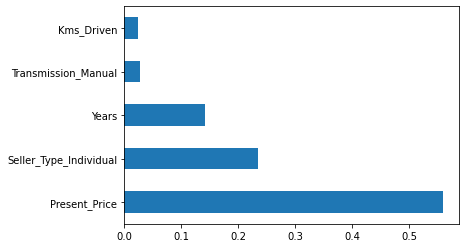

In [23]:
# for feature importance
tree_reg = ExtraTreeRegressor()
tree_reg.fit(X,y)
print(tree_reg.feature_importances_)

#Top 5 important feature
features_importance = pd.Series(tree_reg.feature_importances_,index=X.columns)
features_importance.nlargest(5).plot(kind='barh')
plt.show()

### These 5 features are most important

Splitting the data in train and test

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
model = RandomForestRegressor()

I'm not scaling the value because I'm using random forest and random forest uses decision tree which will not require scaling

In [25]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [26]:
random_regressor = RandomizedSearchCV(estimator = model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, random_state=42, n_jobs = 1)

In [27]:
random_regressor.fit(X,y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error')

We got the best values for our model by performing cross validation
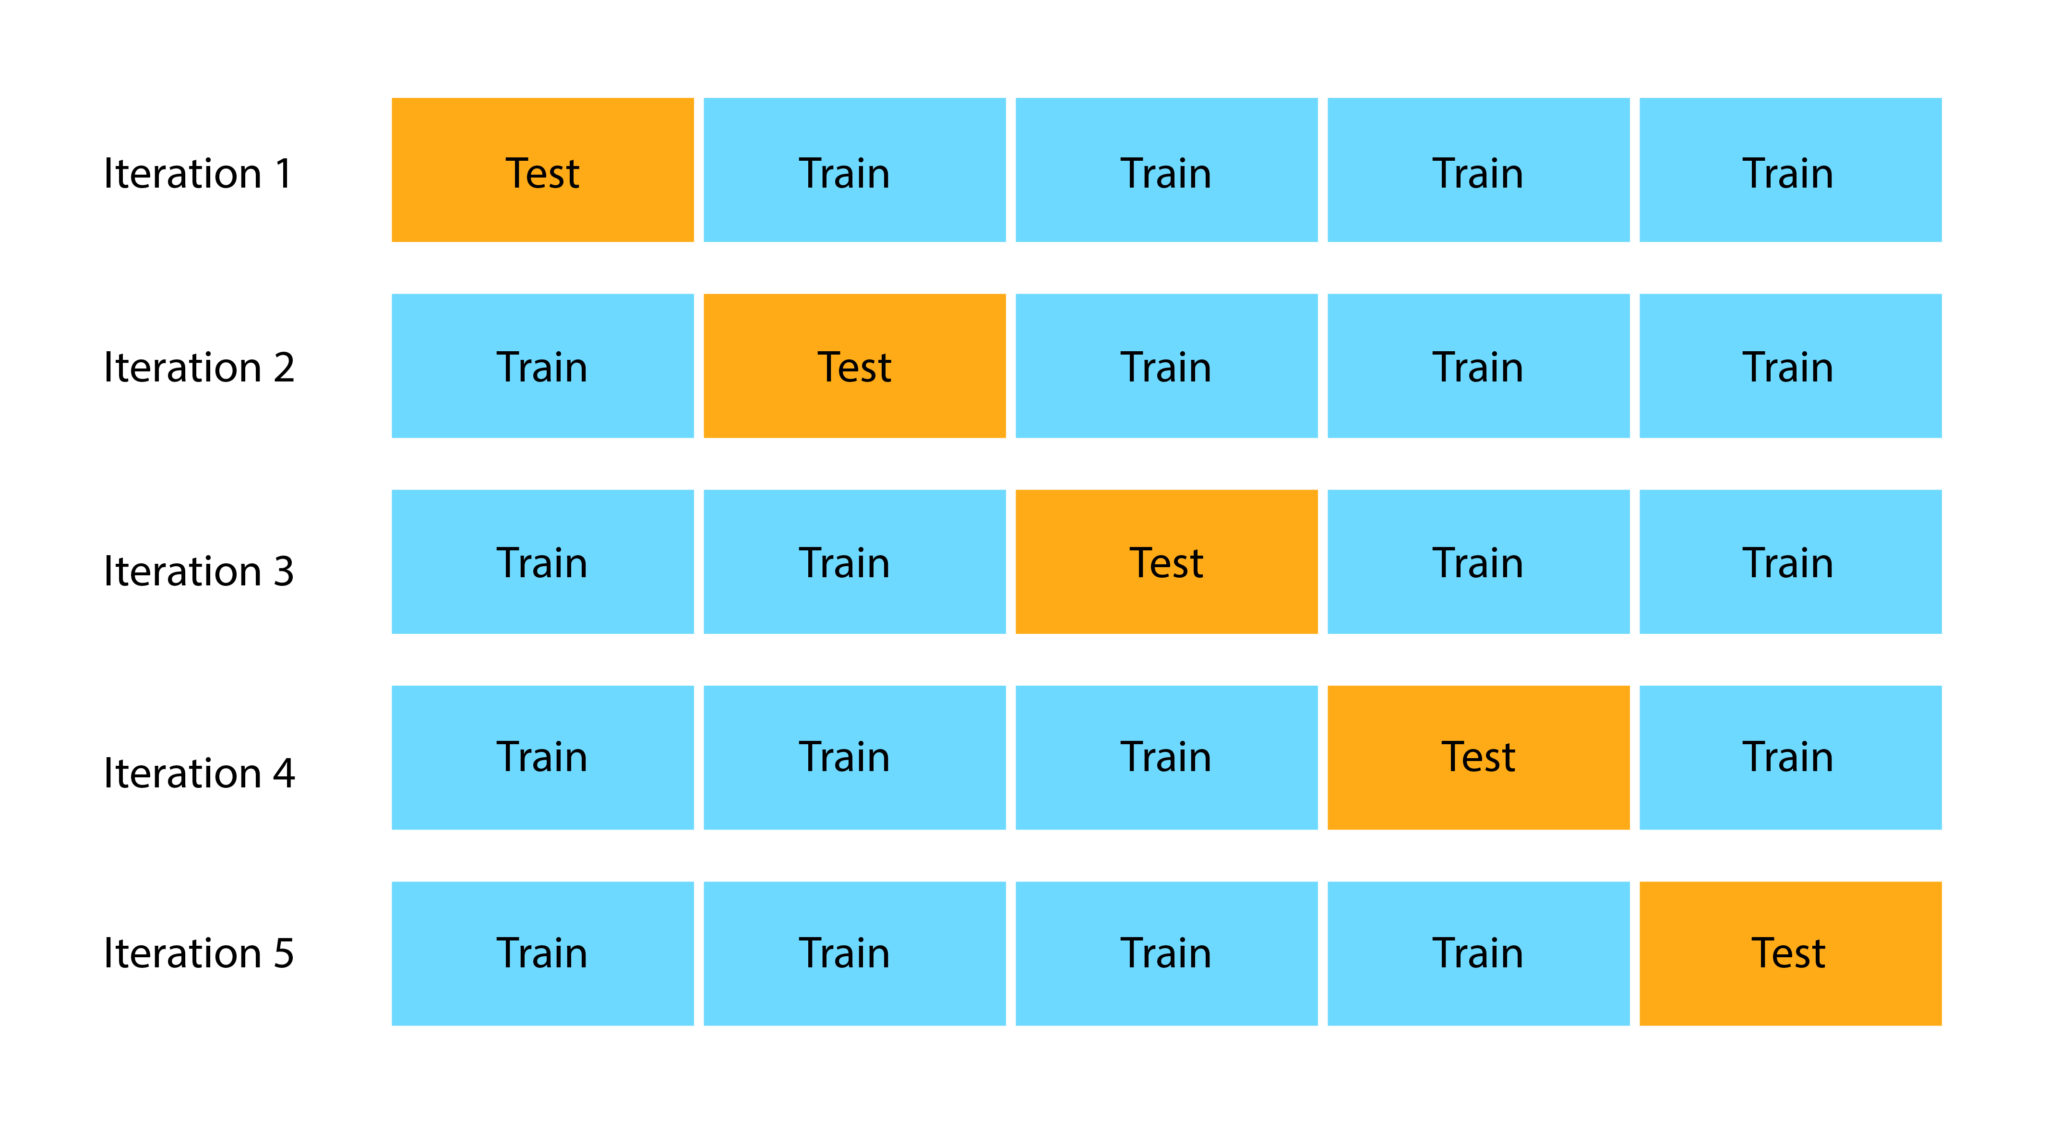

In [28]:
random_regressor.best_params_

{'n_estimators': 1100,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

Now using those values to build the model 

In [29]:
model = RandomForestRegressor(n_estimators = 1100,
                             min_samples_split = 15,
                             min_samples_leaf = 2,
                             max_features = 'auto',
                             max_depth = 20,
                             bootstrap = False)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([ 7.685     ,  0.474     ,  5.40769231,  7.685     , 12.686     ,
        5.40769231,  3.55      ,  0.39384615,  3.55      ,  4.46111111,
        3.15833333,  0.604     ,  5.40769231,  7.685     ,  7.685     ,
       12.686     ,  6.71      ,  3.55      ,  0.474     ,  1.61666667,
        3.85      ,  5.40769231,  4.46111111,  9.70083333,  0.1875    ,
        0.77      ,  0.1875    ,  0.474     ,  0.474     ,  5.88      ,
        2.45      ,  5.41875   ,  0.474     ,  7.685     ,  2.45      ,
        1.13      ,  5.40769231,  4.22857143,  0.1875    ,  9.70083333,
        7.685     , 20.98888889,  5.40769231,  4.22857143,  5.41875   ,
        9.70083333,  0.1875    ,  0.604     ,  5.41875   ,  6.71      ,
        4.46111111,  3.15833333,  5.41875   , 20.98888889,  1.13      ,
        1.13      ,  0.288     ,  2.70833333,  3.55      ,  3.15833333,
        5.88      ,  5.41875   ,  3.15833333, 20.98888889,  4.46111111,
        5.40769231,  9.70083333,  5.88      ,  0.39384615,  3.55

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

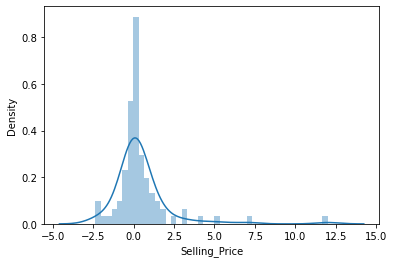

In [30]:
sns.distplot(y_test-y_pred)

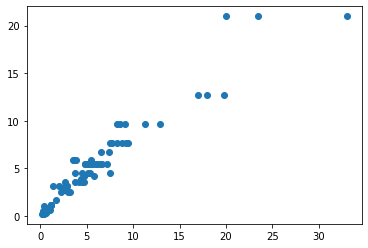

In [31]:
plt.scatter(y_test,y_pred)

We can see that the actual and predicted values are in a good linear relation.

Hence, we can conclude that our prediction has happened quite well.

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) #diff of sum of residuals
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) # diff of sqaured sum sum of residuals
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.915074028230626
MSE: 3.517642603234053
RMSE: 1.8755379503582572


In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8823769165702771

In [38]:
# import pickle
# pickle.dump(random_regressor,open('car_model.pkl','wb'))